In [31]:
import pandas as pd
import numpy as np

import matplotlib as mp
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("https://raw.githubusercontent.com/laknath123/PDS_final_project_animalshelter/main/data/merged_df.csv")

In [33]:
df.head()

,Unnamed: 0,Animal ID,Name_intakes,DateTime_intake,MonthYear_intake,Found Location,Intake Type,Intake Condition,Animal Type_intake,Sex upon Intake,...,Outcome Type,Outcome Subtype,Animal Type_outcomes,Sex upon Outcome,Age upon Outcome,Breed_outcomes,Color_outcomes,age,indicator_col,Time_To_Outcome
0,0,A786884,A786884,2019-01-03 16:19:00,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,...,Transfer,Partner,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,735.0,both,4 days 22:52:00
1,1,A706918,A706918,2015-07-05 12:59:00,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,...,Return to Owner,Unknown,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,2922.0,both,0 days 02:14:00
2,2,A724273,A724273,2016-04-14 18:43:00,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,...,Return to Owner,Unknown,Dog,Neutered Male,1 year,Basenji Mix,Sable/White,370.0,both,6 days 22:34:00
3,3,A665644,A665644,2013-10-21 07:59:00,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,...,Transfer,Partner,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,30.0,both,0 days 03:40:00
4,4,A682524,A682524,2014-06-29 10:38:00,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,...,Return to Owner,Unknown,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,1464.0,both,3 days 03:38:00


In [34]:
df['DateTime_intake'] = pd.to_datetime(df['DateTime_intake'])
df['DateTime_outcomes'] = pd.to_datetime(df['DateTime_outcomes'])

In [35]:
df['intake_month'] = df['DateTime_intake'].dt.month
df['intake_year'] = df['DateTime_intake'].dt.year
df['intake_month_year'] = df['DateTime_intake'].dt.to_period('M')

## What is the date range for our intake and adoption data set 

In [36]:
# Intakes
print(df['DateTime_intake'].max(),"intake end date")
print(df['DateTime_intake'].min(),"intake start date")


print(df['DateTime_outcomes'].max(),'outcome end date') 
print(df['DateTime_outcomes'].min(),'outcome start date')

2022-04-18 16:43:00 intake end date
2013-10-01 07:51:00 intake start date
2022-04-18 16:54:00 outcome end date
2013-10-01 10:39:00 outcome start date


In [37]:
df['DateTime_intake'] =  df['DateTime_intake'].dt.date
df['DateTime_outcomes']= df['DateTime_outcomes'].dt.date

## Are there specific months,days of the week where intake is highest 


In [38]:
df.head()

,Unnamed: 0,Animal ID,Name_intakes,DateTime_intake,MonthYear_intake,Found Location,Intake Type,Intake Condition,Animal Type_intake,Sex upon Intake,...,Sex upon Outcome,Age upon Outcome,Breed_outcomes,Color_outcomes,age,indicator_col,Time_To_Outcome,intake_month,intake_year,intake_month_year
0,0,A786884,A786884,2019-01-03,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,...,Neutered Male,2 years,Beagle Mix,Tricolor,735.0,both,4 days 22:52:00,1,2019,2019-01
1,1,A706918,A706918,2015-07-05,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,...,Spayed Female,8 years,English Springer Spaniel,White/Liver,2922.0,both,0 days 02:14:00,7,2015,2015-07
2,2,A724273,A724273,2016-04-14,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,...,Neutered Male,1 year,Basenji Mix,Sable/White,370.0,both,6 days 22:34:00,4,2016,2016-04
3,3,A665644,A665644,2013-10-21,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,...,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,30.0,both,0 days 03:40:00,10,2013,2013-10
4,4,A682524,A682524,2014-06-29,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,...,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,1464.0,both,3 days 03:38:00,6,2014,2014-06


In [39]:
df_intake = df[['Animal ID','DateTime_intake','intake_month_year',
                'intake_month','intake_year','DateTime_outcomes','Time_To_Outcome','indicator_col','Outcome Type']]

In [40]:
#The seasons are defined as spring (March, April, May), 
#summer (June, July, August), autumn (September, October, November) and winter (December, January, February).
def create_season(x):
    if x in (3,4,5):
        return('Spring')
    elif x in (6,7,8):
        return('Summer')
    elif x in (9,10,11):
        return('Fall')
    else:
        return('Winter')

In [41]:
df_intake['season'] = df_intake['intake_month'].apply(create_season)

C:\Users\lakna\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_intake['intake_year_season']= df_intake['intake_year'].astype('str')+df_intake['season']

C:\Users\lakna\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_intake.head()

,Animal ID,DateTime_intake,intake_month_year,intake_month,intake_year,DateTime_outcomes,Time_To_Outcome,indicator_col,Outcome Type,season,intake_year_season
0,A786884,2019-01-03,2019-01,1,2019,2019-01-08,4 days 22:52:00,both,Transfer,Winter,2019Winter
1,A706918,2015-07-05,2015-07,7,2015,2015-07-05,0 days 02:14:00,both,Return to Owner,Summer,2015Summer
2,A724273,2016-04-14,2016-04,4,2016,2016-04-21,6 days 22:34:00,both,Return to Owner,Spring,2016Spring
3,A665644,2013-10-21,2013-10,10,2013,2013-10-21,0 days 03:40:00,both,Transfer,Fall,2013Fall
4,A682524,2014-06-29,2014-06,6,2014,2014-07-02,3 days 03:38:00,both,Return to Owner,Summer,2014Summer


## Daily Intake Trends

In [44]:
daily_intake = df.groupby(df['DateTime_intake'])['Animal ID'].count()

In [45]:
daily_intake = daily_intake.reset_index()

In [46]:
X = daily_intake.DateTime_intake
y = daily_intake['Animal ID']

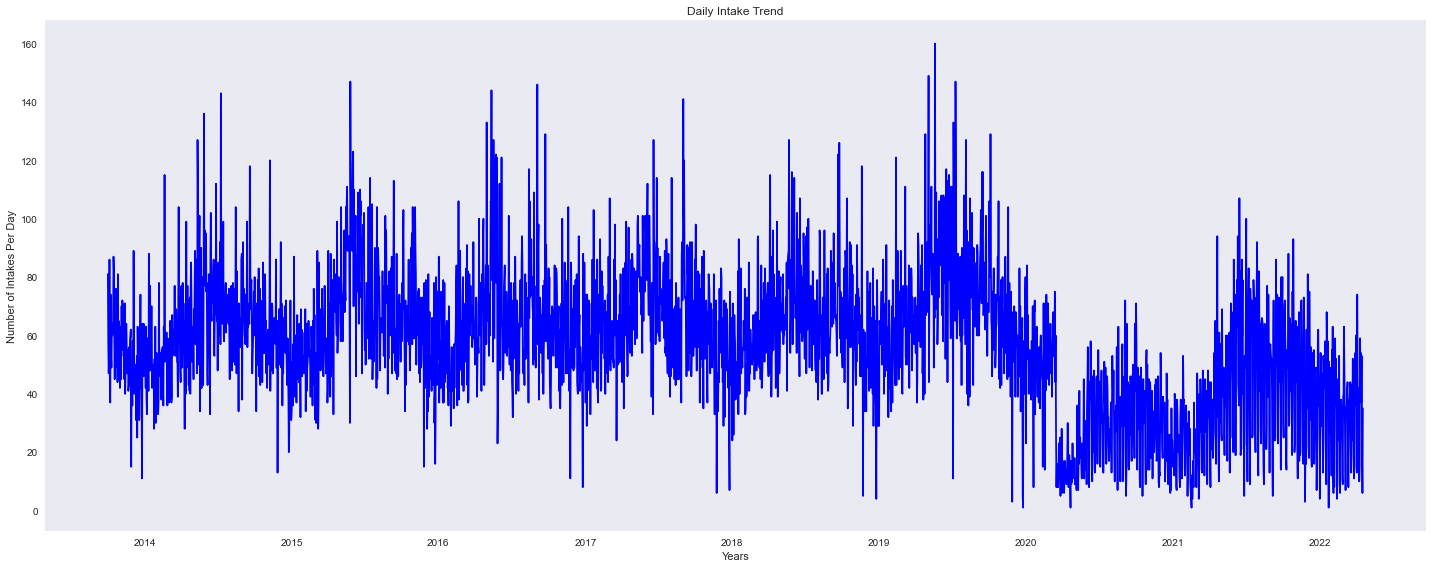

In [47]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(X,y,'b')
plt.title("Daily Intake Trend")
plt.xlabel("Years")
plt.ylabel("Number of Intakes Per Day")
plt.grid(b=None, axis='both')
plt.tight_layout()
plt.show()

## Monthly Intake Trends

In [48]:
#Monthly Intake
monthly_intake = df_intake.groupby(df_intake['intake_month_year'])['Animal ID'].count()

In [49]:
monthly_intake = monthly_intake.reset_index()
monthly_intake

,intake_month_year,Animal ID
0,2013-10,1832
1,2013-11,1601
2,2013-12,1508
3,2014-01,1592
4,2014-02,1477
...,...,...
98,2021-12,1224
99,2022-01,1115
100,2022-02,853
101,2022-03,1032


In [51]:
X = monthly_intake.intake_month_year.astype('str')
y = monthly_intake['Animal ID']
average_monthly_intake = monthly_intake['Animal ID'].mean()

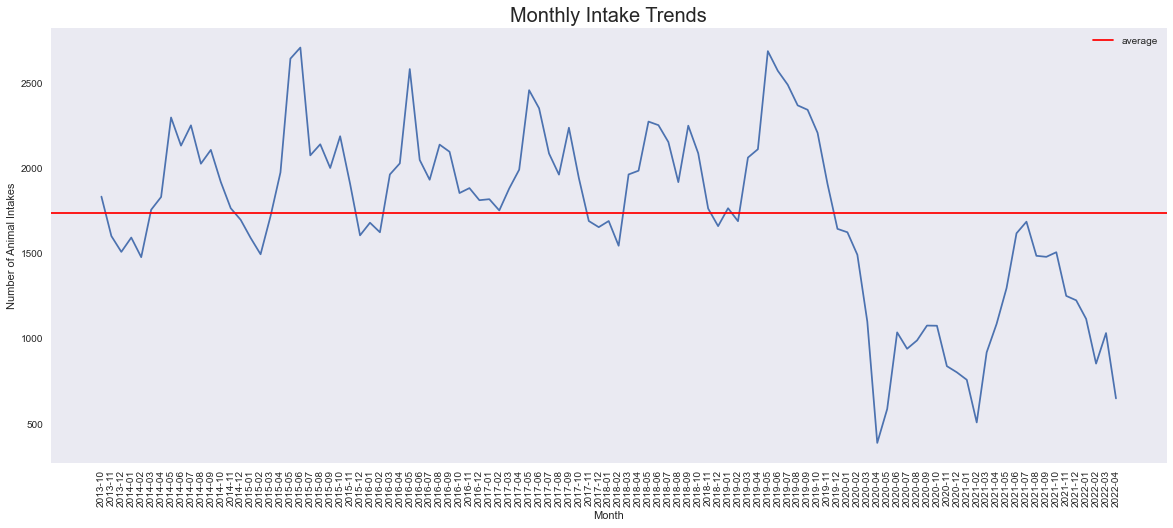

In [52]:
plt.plot(X,y)
plt.title("Monthly Intake Trends",fontsize=20)
plt.xlabel("Month")
plt.ylabel("Number of Animal Intakes")
plt.xticks(rotation = 90)
plt.axhline(y=average_monthly_intake,color = 'red',label="average")
plt.legend()
plt.grid(b=None, axis='both')
plt.show()

In [24]:
df_intake[df_intake.intake_year_season=='2014Spring']

,Animal ID,DateTime_intake,intake_month_year,intake_month,intake_year,DateTime_outcomes,Time_To_Outcome,indicator_col,Outcome Type,season,intake_year_season
82,A678059,2014-05-03,2014-05,5,2014,2014-06-24,52 days 03:20:00,both,Adoption,Spring,2014Spring
86,A678830,2014-05-13,2014-05,5,2014,2014-05-13,0 days 00:16:00,both,Transfer,Spring,2014Spring
124,A678965,2014-05-14,2014-05,5,2014,2014-05-14,0 days 02:09:00,both,Transfer,Spring,2014Spring
127,A676263,2014-04-07,2014-04,4,2014,2014-06-10,64 days 07:20:00,both,Adoption,Spring,2014Spring
128,A678439,2014-05-09,2014-05,5,2014,2014-05-09,0 days 00:48:00,both,Euthanasia,Spring,2014Spring
...,...,...,...,...,...,...,...,...,...,...,...
172999,A679130,2014-05-16,2014-05,5,2014,2014-05-21,5 days 02:45:00,both,Transfer,Spring,2014Spring
173000,A679130,2014-05-16,2014-05,5,2014,2021-12-04,2758 days 23:31:00,both,Return to Owner,Spring,2014Spring
173960,A675175,2014-04-12,2014-04,4,2014,2014-04-15,2 days 18:56:00,both,Adoption,Spring,2014Spring
178139,A678272,2014-05-06,2014-05,5,2014,2014-07-13,68 days 04:06:00,both,Adoption,Spring,2014Spring


## Seasonal Intake Trends

In [25]:
seasonal_intake= df_intake.groupby(df_intake['intake_year_season'])['Animal ID'].count()

In [26]:
seasonal_intake = seasonal_intake.reset_index()
seasonal_intake

,intake_year_season,Animal ID
0,2013Fall,3433
1,2013Winter,1508
2,2014Fall,5788
3,2014Spring,5881
4,2014Summer,6406
5,2014Winter,4765
6,2015Fall,6093
7,2015Spring,6332
8,2015Summer,6919
9,2015Winter,4689


In [27]:
X = seasonal_intake.intake_year_season
y = seasonal_intake['Animal ID']

In [28]:
X

0       2013Fall
1     2013Winter
2       2014Fall
3     2014Spring
4     2014Summer
5     2014Winter
6       2015Fall
7     2015Spring
8     2015Summer
9     2015Winter
10      2016Fall
11    2016Spring
12    2016Summer
13    2016Winter
14      2017Fall
15    2017Spring
16    2017Summer
17    2017Winter
18      2018Fall
19    2018Spring
20    2018Summer
21    2018Winter
22      2019Fall
23    2019Spring
24    2019Summer
25    2019Winter
26      2020Fall
27    2020Spring
28    2020Summer
29    2020Winter
30      2021Fall
31    2021Spring
32    2021Summer
33    2021Winter
34    2022Spring
35    2022Winter
Name: intake_year_season, dtype: object

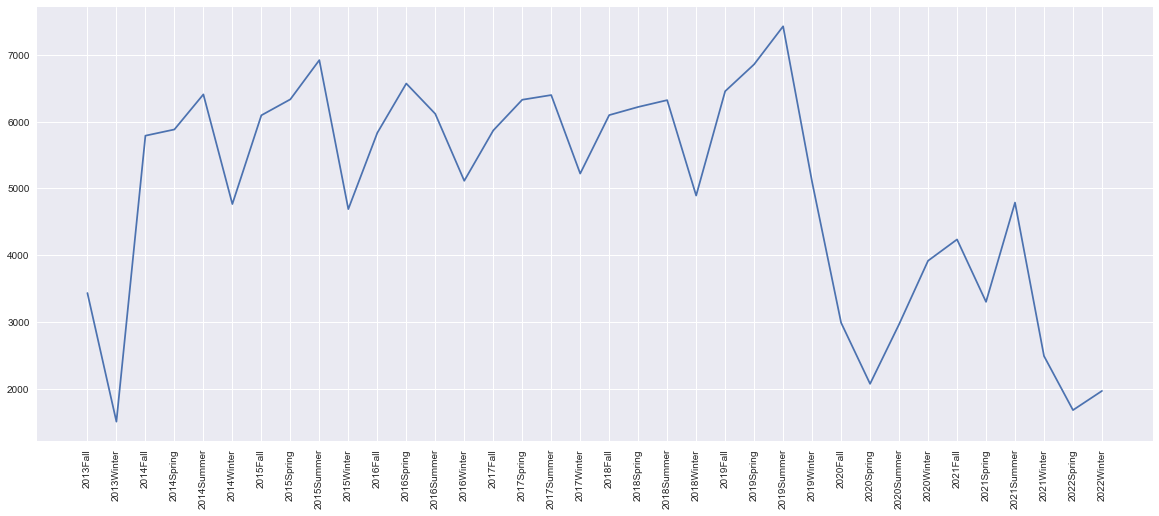

In [29]:
plt.plot(X,y)
plt.xticks(rotation = 90)
plt.show()

## Calculating Time for Adoption

In [30]:
df_intake_withoutcomes['Outcome Type'].unique()

NameError: name 'df_intake_withoutcomes' is not defined

In [ ]:
df_intake_withoutcomes = df_intake[(df_intake['indicator_col']=='both') & (df_intake['Outcome Type']=='Adoption')]

In [ ]:
df_intake_withoutcomes['Time_To_Outcome']= df_intake_withoutcomes ['Time_To_Outcome'].astype(str).str[0]

In [ ]:
df_intake_withoutcomes = df_intake_withoutcomes[~(df_intake_withoutcomes.Time_To_Outcome=='-')]
# This step may not be nessesary once the data cleaning pipleline handles this

In [ ]:
df_intake_withoutcomes['Time_To_Outcome'] = df_intake_withoutcomes['Time_To_Outcome'].astype('int64')

In [ ]:
plt.boxplot(df_intake_withoutcomes.Time_To_Outcome,vert= False)
plt.show()

In [ ]:
avg_time_foradoption= df_intake_withoutcomes.groupby(df_intake_withoutcomes['intake_month_year'])['Time_To_Outcome'].mean()

In [ ]:
avg_time_foradoption= avg_time_foradoption.reset_index()

In [ ]:
avg_time_foradoption['Time_To_Outcome'].mean()

In [ ]:
X = avg_time_foradoption['intake_month_year'].astype('str')
y = avg_time_foradoption['Time_To_Outcome']

In [ ]:
plt.plot(X,y)
plt.rcParams["figure.figsize"] = (20,8)
plt.title("Average Time for Adoption in Days",fontsize=20)
plt.xlabel("Month")
plt.ylabel("Number of Days")
plt.xticks(rotation = 90)
# plt.axhline(y=average_monthly_intake,color = 'red',label="average")
# plt.legend()
plt.grid(b=None, axis='both')
plt.show()

In [ ]:
x= 
y = monthly_intake['Animal ID']

In [ ]:
pd.concat([avg_time_foradoption['Time_To_Outcome'], np.log(monthly_intake['Animal ID'])], axis=1).plot()



## Mean Time for Adoption Between Cats and Dogs

## Specific Days of the Week Where Adoption is highest